In [1]:
## Okay so the other notebook was getting way too disorganized for comfort so here's a new one with...
## ... the plots that I fooled around with/successfully produced for phytoplankton binned with temperature...
## With volume weighted mean included 

In [2]:
import xarray as xr
import numpy as np 
from matplotlib import pyplot as plt

In [3]:
rootdir = '/archive/oar.gfdl.cmip6/ESM4/DECK/ESM4_piControl_D/gfdl.ncrc4-intel16-prod-openmp/pp/'
datadir_temperature = 'ocean_monthly_z/ts/monthly/5yr/'
filename_temperature = 'ocean_monthly_z.071101-071512.thetao.nc'



datadir_phytoplankton = 'ocean_cobalt_omip_tracers_month_z/ts/monthly/5yr/'
filename_phytoplankton = 'ocean_cobalt_omip_tracers_month_z.071101-071512.phyc.nc'


temperature = xr.open_dataset(rootdir+datadir_temperature+filename_temperature)
phytoplankton = xr.open_dataset(rootdir+datadir_phytoplankton+filename_phytoplankton)

/nbhome/Alexandra.Matthews/miniconda/envs/basic/lib/python3.7/site-packages/xarray/coding/times.py:419: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  self.use_cftime)


In [4]:
ds = xr.merge([temperature, phytoplankton])

/nbhome/Alexandra.Matthews/miniconda/envs/basic/lib/python3.7/site-packages/numpy/core/numeric.py:538: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return array(a, dtype, copy=False, order=order)
/nbhome/Alexandra.Matthews/miniconda/envs/basic/lib/python3.7/site-packages/numpy/core/numeric.py:538: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return array(a, dtype, copy=False, order=order)


In [5]:
filename_volume = 'ocean_cobalt_omip_tracers_month_z.071101-071512.volcello.nc'
volume = xr.open_dataset(rootdir+datadir_phytoplankton+filename_volume)

/nbhome/Alexandra.Matthews/miniconda/envs/basic/lib/python3.7/site-packages/xarray/coding/times.py:419: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  self.use_cftime)


In [6]:
df = xr.merge([ds, volume])

/nbhome/Alexandra.Matthews/miniconda/envs/basic/lib/python3.7/site-packages/numpy/core/numeric.py:538: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return array(a, dtype, copy=False, order=order)
/nbhome/Alexandra.Matthews/miniconda/envs/basic/lib/python3.7/site-packages/numpy/core/numeric.py:538: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return array(a, dtype, copy=False, order=order)


In [7]:
pV = df.volcello*df.phyc
pV.name = 'pV'
df = xr.merge([df,pV])

In [8]:
df = df.set_coords('thetao')
theta_bins = np.arange(-2,30,2) 
pV_in_theta = df.pV.isel(time=5,z_l=0).groupby_bins('thetao',theta_bins)
V_in_theta = df.volcello.isel(time=5,z_l=0).groupby_bins('thetao',theta_bins)

In [9]:
p_vmean = pV_in_theta.sum(xr.ALL_DIMS)/V_in_theta.sum(xr.ALL_DIMS)

Text(0, 0.5, 'Concentration (mol m^-3)')

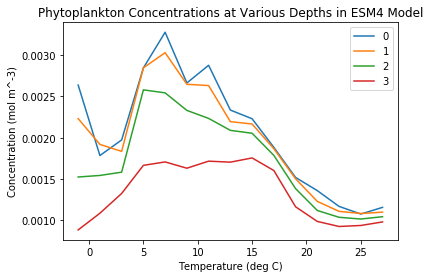

In [14]:
## June phytoplankton concentrations at depths 0-3 in the ESM4 model
## I'm only using this as a comparison for the next two graphs that will be in the same month and at the same depth...
#.. but in different hemispheres 

for z in (0,1,2,3):

    pV_in_theta = df.pV.isel(time=5,z_l=z).groupby_bins('thetao',theta_bins)
    V_in_theta = df.volcello.isel(time=5,z_l=z).groupby_bins('thetao',theta_bins)

    p_vmean = pV_in_theta.sum(xr.ALL_DIMS)/V_in_theta.sum(xr.ALL_DIMS)

    p_vmean.plot(label= '%s' % z)

plt.title('Phytoplankton Concentrations at Various Depths in ESM4 Model')
plt.legend()
plt.xlabel('Temperature (deg C)')
plt.ylabel('Concentration (mol m^-3)')

Text(0, 0.5, 'Concentration (mol m^-3)')

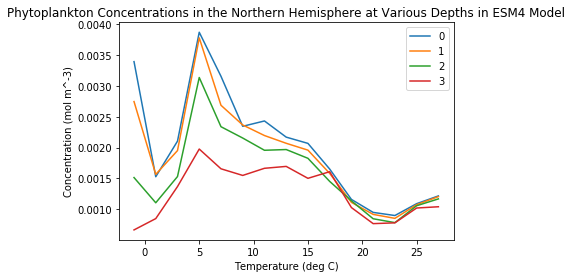

In [12]:
## Data for the northern hemisphere (??)

for z in (0,1,2,3):

    pV_in_theta = df.pV.isel(time=5,z_l=z,xh=range(0,360)).groupby_bins('thetao',theta_bins)
    V_in_theta = df.volcello.isel(time=5,z_l=z,xh=range(0,360)).groupby_bins('thetao',theta_bins)

    p_vmean = pV_in_theta.sum(xr.ALL_DIMS)/V_in_theta.sum(xr.ALL_DIMS)

    p_vmean.plot(label= '%s' % z)

plt.title('Phytoplankton Concentrations in the Northern Hemisphere at Various Depths in ESM4 Model')
plt.legend()
plt.xlabel('Temperature (deg C)')
plt.ylabel('Concentration (mol m^-3)')

Text(0, 0.5, 'Concentration (mol m^-3)')

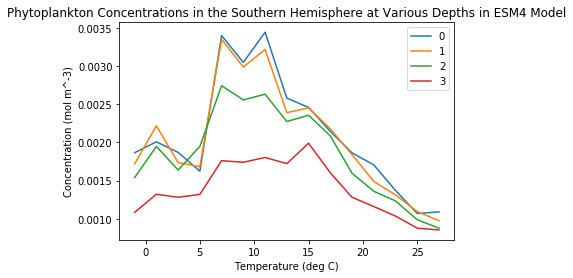

In [13]:
## Data for the southern hemisphere 

for z in (0,1,2,3):

    pV_in_theta = df.pV.isel(time=5,z_l=z,xh=range(360,720)).groupby_bins('thetao',theta_bins)
    V_in_theta = df.volcello.isel(time=5,z_l=z,xh=range(360,720)).groupby_bins('thetao',theta_bins)

    p_vmean = pV_in_theta.sum(xr.ALL_DIMS)/V_in_theta.sum(xr.ALL_DIMS)

    p_vmean.plot(label= '%s' % z)

plt.title('Phytoplankton Concentrations in the Southern Hemisphere at Various Depths in ESM4 Model')
plt.legend()
plt.xlabel('Temperature (deg C)')
plt.ylabel('Concentration (mol m^-3)')

Text(0, 0.5, 'Concentration (mol m^-3)')

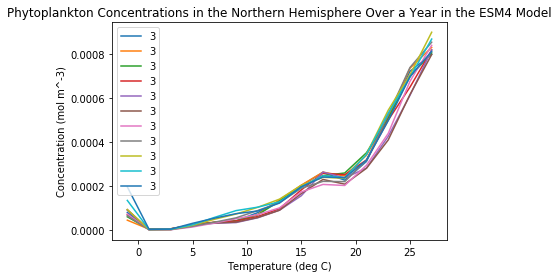

In [16]:
## Now let's see how the graph looks when we go based off of various months and not depths 
## Let's do the northern hemisphere first



for t in range(0,11,1):

    pV_in_theta = df.pV.isel(time=t,xh=range(0,360)).groupby_bins('thetao',theta_bins)
    V_in_theta = df.volcello.isel(time=t,xh=range(0,360)).groupby_bins('thetao',theta_bins)

    p_vmean = pV_in_theta.sum(xr.ALL_DIMS)/V_in_theta.sum(xr.ALL_DIMS)

    p_vmean.plot(label= '%s' % z)

plt.title('Phytoplankton Concentrations in the Northern Hemisphere Over a Year in the ESM4 Model')
plt.legend()
plt.xlabel('Temperature (deg C)')
plt.ylabel('Concentration (mol m^-3)')

Text(0, 0.5, 'Concentration (mol m^-3)')

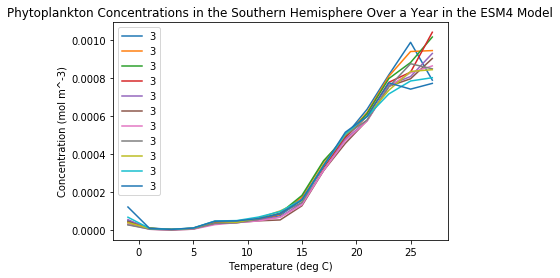

In [18]:
## And here's the southern hemisphere over the course of a year over all depths 

for t in range(0,11,1):

    pV_in_theta = df.pV.isel(time=t,xh=range(360,720)).groupby_bins('thetao',theta_bins)
    V_in_theta = df.volcello.isel(time=t,xh=range(360,720)).groupby_bins('thetao',theta_bins)

    p_vmean = pV_in_theta.sum(xr.ALL_DIMS)/V_in_theta.sum(xr.ALL_DIMS)

    p_vmean.plot(label= '%s' % z)

plt.title('Phytoplankton Concentrations in the Southern Hemisphere Over a Year in the ESM4 Model')
plt.legend()
plt.xlabel('Temperature (deg C)')
plt.ylabel('Concentration (mol m^-3)')

Text(0, 0.5, 'Concentration (mol m^-3)')

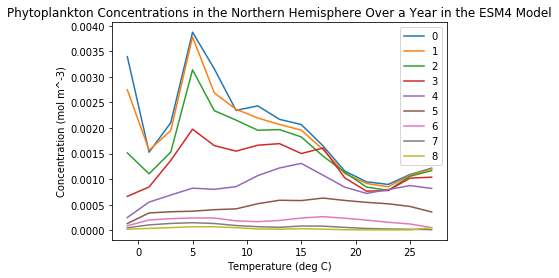

In [22]:
## Okay so all of the months are looking the same at all of the depths. 
## I don't think we'll need to plot ALL of the depths, to be honest; just some of them 
## Going based off of the results from my multiple phytoplankton maps in the file titled "phytoplankton-maps", I think graphing data with..
## ..only one month (June) and up to 7 depths might make a difference


##### Let's try this method with the northern hemisphere 

for z in range(0,9,1):

    pV_in_theta = df.pV.isel(time=5,z_l=z,xh=range(0,360)).groupby_bins('thetao',theta_bins)
    V_in_theta = df.volcello.isel(time=5,z_l=z,xh=range(0,360)).groupby_bins('thetao',theta_bins)

    p_vmean = pV_in_theta.sum(xr.ALL_DIMS)/V_in_theta.sum(xr.ALL_DIMS)

    p_vmean.plot(label= '%s' % z)

plt.title('Phytoplankton Concentrations in the Northern Hemisphere Over a Year in the ESM4 Model')
plt.legend()
plt.xlabel('Temperature (deg C)')
plt.ylabel('Concentration (mol m^-3)')

In [23]:
## Alrighty so it seems as though after 7 depth levels the phytoplankton concentration becomes similar/there aren't many differences that the model picks up. 